In [36]:
# Data Manipulattion
import numpy as np
import pandas as pd
from scipy import stats
import os, gc

# Visualization
import matplotlib.pyplot as plt

# Display markdown formatted output bold
from IPython.display import Markdown
def bold(string):display(Markdown(string))

In [37]:
# loading data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
weather_train = pd.read_csv('weather_train.csv')
weather_test = pd.read_csv('weather_test.csv')
building = pd.read_csv('building_metadata.csv')

## Data transformation due to error in measurement. 
Réf : https://www.kaggle.com/c/ashrae-energy-prediction/discussion/119261

In [38]:
train.loc[(train.meter == 0), 'meter_reading'] =  train.loc[(train.meter == 0), 'meter_reading'] * 0.2931

In [39]:
print(train.meter_reading[0:20],"meter_reading")

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: meter_reading, dtype: float64 meter_reading


In [40]:
# Head of data
bold('**head of Train Data:**')
display(train.head())

bold('**head of Test Data:**')
display(test.head())

bold('**head of building data**')
display(building.head())
bold('**head of Weather Train Data:**')
display(weather_train.head())
bold('**head of Weather Test Data:**')
display(weather_test.head())


**head of Train Data:**

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


**head of Test Data:**

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


**head of building data**

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


**head of Weather Train Data:**

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


**head of Weather Test Data:**

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6


In [41]:
bold('**Shape of Data**')
print('Dimension of building:', building.shape) 
print('Dimension of Weather train:',weather_train.shape) 
print('Dimension of Weather test:', weather_test.shape)
print('Dimension of train:',train.shape) 
print('Dimension of test:',test.shape)

**Shape of Data**

Dimension of building: (1449, 6)
Dimension of Weather train: (139773, 9)
Dimension of Weather test: (277243, 9)
Dimension of train: (20216100, 4)
Dimension of test: (41697600, 4)


In [42]:
# Merging datasets

train = train.merge(building, on = 'building_id', how = 'left')
test = test.merge(building, on = 'building_id', how = 'left')
train = train.merge(weather_train, on = ['site_id', 'timestamp'], how = 'left')
test = test.merge(weather_test, on = ['site_id', 'timestamp'], how = 'left')

del weather_train, weather_test, building

In [44]:
#Function to reduce memory size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [45]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

Mem. usage decreased to 1041.10 Mb (60.3% reduction)
Mem. usage decreased to 2147.36 Mb (60.3% reduction)


In [58]:
'''Variable Description'''
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Counts'] = df.count().values    
    summary['Missing'] = df.isnull().sum().values 
    summary['Uniques'] = df.nunique().values
    summary['min Value'] = df.min().values
    
    return summary

In [59]:
bold('**Variable Description of  train Data:**')
description(train)

**Variable Description of  train Data:**

,Name,dtypes,Counts,Missing,Uniques,min Value
0,building_id,int16,20216100,0,1449,0
1,meter,object,20216100,0,4,ChilledWater
2,timestamp,datetime64[ns],20216100,0,8784,2016-01-01 00:00:00
3,meter_reading,float32,20216100,0,2269021,0.0
4,site_id,int8,20216100,0,16,0
5,primary_use,object,20216100,0,16,Education
6,square_feet,int32,20216100,0,1397,283
7,year_built,float16,8088455,12127645,116,1900.0
8,floor_count,float16,3506933,16709167,18,1.0
9,air_temperature,float16,20119442,96658,619,-28.90625


In [60]:
bold('**Variable Description of test Data:**')
description(test)

**Variable Description of test Data:**

,Name,dtypes,Counts,Missing,Uniques,min Value
0,row_id,int32,41697600,0,41697600,0
1,building_id,int16,41697600,0,1449,0
2,meter,object,41697600,0,4,ChilledWater
3,timestamp,datetime64[ns],41697600,0,17520,2017-01-01 00:00:00
4,site_id,int8,41697600,0,16,0
5,primary_use,object,41697600,0,16,Education
6,square_feet,int32,41697600,0,1397,283
7,year_built,float16,17099520,24598080,116,1900.0
8,floor_count,float16,7253280,34444320,18,1.0
9,air_temperature,float16,41475699,221901,639,-28.09375


### Feature Engineering :

Convert timestamp into month, weekday, day, hour.
convert 

In [49]:
train["timestamp"] = pd.to_datetime(train["timestamp"])
train["hour"] = np.uint8(train["timestamp"].dt.hour)
train["day"] = np.uint8(train["timestamp"].dt.day)
#train["weekday_name"] = train["timestamp"].dt.day_name()
train["weekday"] = np.uint8(train["timestamp"].dt.weekday)
train["month"] = np.uint8(train["timestamp"].dt.month)

test["timestamp"] = pd.to_datetime(test["timestamp"])
test["hour"] = np.uint8(test["timestamp"].dt.hour)
test["day"] = np.uint8(test["timestamp"].dt.day)
test["weekday"] = np.uint8(test["timestamp"].dt.weekday)
test["month"] = np.uint8(test["timestamp"].dt.month)

In [50]:
# Convert variable "meter"
train['meter'].replace({0:"Electricity",1:"ChilledWater",2:"Steam",3:"HotWater"},inplace=True)
test['meter'].replace({0:"Electricity",1:"ChilledWater",2:"Steam",3:"HotWater"},inplace=True)

In [61]:
bold('**head of Train Data:**')
display(train.head())

**head of Train Data:**

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month
0,0,Electricity,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0,0,1,4,1
1,1,Electricity,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0,0,1,4,1
2,2,Electricity,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0,0,1,4,1
3,3,Electricity,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0,0,1,4,1
4,4,Electricity,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0,0,1,4,1


### Imputting missing variables
We see that we have 9 varibales with missing values.


In [63]:
# impute missing variables by median 

train_impute = train.loc[:, ['year_built','floor_count','air_temperature', 'cloud_coverage', 'dew_temperature',
                      'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction','wind_speed']]

for i in train_impute.columns:
    train[i].fillna(train[i].median(), inplace = True)

test_impute = test.loc[:, ['year_built','floor_count','air_temperature', 'cloud_coverage', 'dew_temperature',
                      'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction','wind_speed']]
for i in test_impute.columns:
    test[i].fillna(test[i].median(), inplace = True)

In [64]:
# Encoding of variable Using "primary_use"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['primary_use'] = le.fit_transform(train['primary_use'])
test['primary_use'] = le.fit_transform(test['primary_use'])

In [66]:
'''Now extract the nominal variables for one hot encoding of train and test data.'''
one_hot_train = pd.get_dummies(train['meter'])
one_hot_test = pd.get_dummies(test['meter'])

In [67]:
# droping unused variables
train.drop(columns=['meter', 'timestamp'], axis = 1, inplace = True)
test.drop(columns=['meter', 'timestamp'], axis = 1, inplace = True)

In [68]:
# concate one hot encoded, with other variables
train_processed = pd.concat([one_hot_train, train], axis = 1)
test_processed = pd.concat([one_hot_test, test], axis = 1)

#### Base Model

In [70]:
# Overview of data 
print("Train Data")
display(train_processed.head())
print("Test Data")
display(test_processed.head())

Train Data


,ChilledWater,Electricity,HotWater,Steam,building_id,meter_reading,site_id,primary_use,square_feet,year_built,...,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month
0,0,1,0,0,0,0.0,0,0,7432,2008.0,...,6.0,20.0,0.0,1019.5,0.0,0.0,0,1,4,1
1,0,1,0,0,1,0.0,0,0,2720,2004.0,...,6.0,20.0,0.0,1019.5,0.0,0.0,0,1,4,1
2,0,1,0,0,2,0.0,0,0,5376,1991.0,...,6.0,20.0,0.0,1019.5,0.0,0.0,0,1,4,1
3,0,1,0,0,3,0.0,0,0,23685,2002.0,...,6.0,20.0,0.0,1019.5,0.0,0.0,0,1,4,1
4,0,1,0,0,4,0.0,0,0,116607,1975.0,...,6.0,20.0,0.0,1019.5,0.0,0.0,0,1,4,1


Test Data


,ChilledWater,Electricity,HotWater,Steam,row_id,building_id,site_id,primary_use,square_feet,year_built,...,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month
0,0,1,0,0,0,0,0,0,7432,2008.0,...,4.0,11.703125,0.0,1021.5,100.0,3.599609,0,1,6,1
1,0,1,0,0,1,1,0,0,2720,2004.0,...,4.0,11.703125,0.0,1021.5,100.0,3.599609,0,1,6,1
2,0,1,0,0,2,2,0,0,5376,1991.0,...,4.0,11.703125,0.0,1021.5,100.0,3.599609,0,1,6,1
3,0,1,0,0,3,3,0,0,23685,2002.0,...,4.0,11.703125,0.0,1021.5,100.0,3.599609,0,1,6,1
4,0,1,0,0,4,4,0,0,116607,1975.0,...,4.0,11.703125,0.0,1021.5,100.0,3.599609,0,1,6,1


In [71]:
# target variable, train and  test datasets
target = train_processed['meter_reading']
train = train_processed.drop(['meter_reading'], axis = 1)
test = test_processed.drop(['row_id'], axis = 1)

In [74]:
# Shape of data for modelling
print('Train dimension:', train.shape)
print('Target dimension:',target.shape)
print('Test dimension:', test.shape)

Train dimension: (20216100, 21)
Target dimension: (20216100,)
Test dimension: (41697600, 21)


In [75]:
description(train)

,Name,dtypes,Counts,Missing,Uniques,min Value
0,ChilledWater,uint8,20216100,0,2,0.00000
1,Electricity,uint8,20216100,0,2,0.00000
2,HotWater,uint8,20216100,0,2,0.00000
3,Steam,uint8,20216100,0,2,0.00000
4,building_id,int16,20216100,0,1449,0.00000
5,site_id,int8,20216100,0,16,0.00000
6,primary_use,int64,20216100,0,16,0.00000
7,square_feet,int32,20216100,0,1397,283.00000
8,year_built,float16,20216100,0,116,1900.00000
9,floor_count,float16,20216100,0,18,1.00000


In [76]:
description(test)

,Name,dtypes,Counts,Missing,Uniques,min Value
0,ChilledWater,uint8,41697600,0,2,0.00000
1,Electricity,uint8,41697600,0,2,0.00000
2,HotWater,uint8,41697600,0,2,0.00000
3,Steam,uint8,41697600,0,2,0.00000
4,building_id,int16,41697600,0,1449,0.00000
5,site_id,int8,41697600,0,16,0.00000
6,primary_use,int64,41697600,0,16,0.00000
7,square_feet,int32,41697600,0,1397,283.00000
8,year_built,float16,41697600,0,116,1900.00000
9,floor_count,float16,41697600,0,18,1.00000


In [77]:
display(test.head(3))
display(test.tail(10))

,ChilledWater,Electricity,HotWater,Steam,building_id,site_id,primary_use,square_feet,year_built,floor_count,...,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month
0,0,1,0,0,0,0,0,7432,2008.0,3.0,...,4.0,11.703125,0.0,1021.5,100.0,3.599609,0,1,6,1
1,0,1,0,0,1,0,0,2720,2004.0,3.0,...,4.0,11.703125,0.0,1021.5,100.0,3.599609,0,1,6,1
2,0,1,0,0,2,0,0,5376,1991.0,3.0,...,4.0,11.703125,0.0,1021.5,100.0,3.599609,0,1,6,1


,ChilledWater,Electricity,HotWater,Steam,building_id,site_id,primary_use,square_feet,year_built,floor_count,...,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month
41697590,0,1,0,0,1440,15,4,150294,1987.0,3.0,...,2.0,8.898438,0.0,1016.0,180.0,3.099609,7,9,2,5
41697591,0,1,0,0,1441,15,0,30143,1951.0,3.0,...,2.0,8.898438,0.0,1016.0,180.0,3.099609,7,9,2,5
41697592,0,1,0,0,1442,15,9,99541,1993.0,3.0,...,2.0,8.898438,0.0,1016.0,180.0,3.099609,7,9,2,5
41697593,0,0,0,1,1442,15,9,99541,1993.0,3.0,...,2.0,8.898438,0.0,1016.0,180.0,3.099609,7,9,2,5
41697594,0,1,0,0,1443,15,0,40311,1913.0,3.0,...,2.0,8.898438,0.0,1016.0,180.0,3.099609,7,9,2,5
41697595,0,1,0,0,1444,15,1,19619,1914.0,3.0,...,2.0,8.898438,0.0,1016.0,180.0,3.099609,7,9,2,5
41697596,0,1,0,0,1445,15,0,4298,1969.0,3.0,...,2.0,8.898438,0.0,1016.0,180.0,3.099609,7,9,2,5
41697597,0,1,0,0,1446,15,1,11265,1997.0,3.0,...,2.0,8.898438,0.0,1016.0,180.0,3.099609,7,9,2,5
41697598,0,1,0,0,1447,15,4,29775,2001.0,3.0,...,2.0,8.898438,0.0,1016.0,180.0,3.099609,7,9,2,5
41697599,0,1,0,0,1448,15,6,92271,2001.0,3.0,...,2.0,8.898438,0.0,1016.0,180.0,3.099609,7,9,2,5


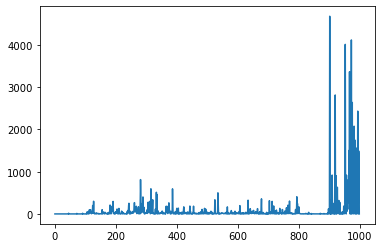

In [78]:
plt.plot(target[0:1000])

### Split Data for train and test

In [79]:
# Option split

import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV # train_test_split,TimeSeriesSplit
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

x_train05 , x_test05, target_train05, target_test05 = train_test_split(train, target, test_size=0.2, random_state=42, shuffle=False)


## Option 1 : Decision Tree TRAINING

In [90]:
# Option 1 : DEcision Tree TRAINING


tree_model = DecisionTreeRegressor()
tree_model = tree_model.fit(x_train05, target_train05)

#tree_model = DecisionTreeRegressor(max_depth=15,random_state=1)

In [ ]:
# score and accuracy on train data
score = tree_model.score(x_train05, target_train05)
print("R-squared:", score)

In [ ]:
########### Testing 1
from math import sqrt

ypred05 = tree_model.predict(x_test05)

In [ ]:
# Score
rmsle = np.sqrt(np.mean((np.log1p(ypred05) - np.log1p(target_test05))**2))
print('RMSLE: ', rmsle)

In [ ]:
#np.count_nonzero(ypred05 > 0) /len(ypred05)*100

In [ ]:
df_ypred05 = pd.DataFrame(ypred05)
description(df_ypred05)

In [ ]:
#from string import count

print(ypred05.min(), ypred05.max(), df_ypred05.count("0" == 0))


In [ ]:
y_pred = tree_model.predict(test)

### Submission

### Simulation on test dataset

In [88]:
########### Testing Model 1

ypred_01 = tree_model.predict(test)
test_01 = test
test_01['meter_reading'] = ypred_01

In [89]:
test_01.loc[(test_01.meter == 0), 'meter_reading'] =  test_01.loc[(test_01.meter == 0), 'meter_reading'] * 3.4118 

AttributeError: 'DataFrame' object has no attribute 'meter'

In [114]:
# Submission to csv
my_submission01 = pd.DataFrame({'row_id': test_processed.row_id, 'meter_reading': test_01.meter_reading})
my_submission01.to_csv('my_submission01.csv', index=False)

In [116]:
description(my_submission01)

,Name,dtypes,Counts,Missing,Uniques,Second Value,Third Value
0,row_id,int32,41697600,0,41697600,1.000000,2.0
1,meter_reading,float64,41697600,0,77014,0.071926,0.0


In [117]:
!tar cvfz sub_01.tar.gz my_submission01.csv

my_submission01.csv


In [118]:
my_submission01.meter_reading.head(20)

0       0.000000
1       0.071926
2       0.000000
3       0.000000
4       0.706294
5       0.010461
6       0.000000
7       0.516818
8     815.468254
9       0.000000
10      0.000000
11     75.407837
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16     53.973905
17      0.000000
18    600.380269
19      0.000000
Name: meter_reading, dtype: float64

In [ ]:
"""
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.model_selection import KFold, StratifiedKFold
from tqdm import tqdm

params = {
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': {'rmse'},
            'subsample': 0.25,
            'subsample_freq': 1,
            'learning_rate': 0.3,
            'num_leaves': 20,
            'feature_fraction': 0.9,
            'lambda_l1': 1,  
            'lambda_l2': 1
            }

folds = 4
seed = 55
kf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)
# oof_pred = np.zeros(train.shape[0])  # out of fold predictions
models = []

## stratify data by building_id
for train_index, val_index in tqdm(kf.split(train, train['building_id']), total=folds):
    train_X = train.iloc[train_index]
    val_X = train.iloc[val_index]
    train_y = target.iloc[train_index]
    val_y = target.iloc[val_index]
    lgb_train = lgb.Dataset(train_X, train_y, categorical_feature=cat_feat)
    lgb_eval = lgb.Dataset(val_X, val_y, categorical_feature=cat_feat)
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=500,
                valid_sets=(lgb_train, lgb_eval),
                early_stopping_rounds=100,
                verbose_eval = 100)
    models.append(gbm)
"""

In [ ]:
"""
plt.rcParams['figure.figsize'] = (18,10)
lgb.plot_importance(models[0], importance_type='gain')
plt.show()

In [ ]:
"""
i=0
result=[]
step_size = 50000
for j in tqdm(range(int(np.ceil(test.shape[0]/50000)))):
    result.append(np.expm1(sum([model.predict(test.iloc[i:i+step_size]) for model in models])/folds))
    i+=step_size

In [ ]:
"""
'''Submission'''
result = np.concatenate(result)

submission = pd.read_csv("sample_submission.csv")
submission["meter_reading"] = result
submission.to_csv("submissionlgbm.csv", index = False)


In [ ]:
"""
!tar cvfz vv.tar.gz submissionlgbm.csv
